<a href="https://colab.research.google.com/github/Nikkiie/Bike-sharing-demand-prediction-Cap-2-/blob/main/1Individual_colab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT TITLE - Seoul Bike Sharing Demand Prediction** 

### Importing Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Giving the file path

file_path = ('/content/drive/MyDrive/cap 2/SeoulBikeData (1).csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

### Dataset First View

In [4]:
# It is a good habit to copy the data for backup
df = df.copy()

In [5]:
# Checking top 5 rows in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Checking last 5 rows in dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Data shape
df.shape

(8760, 14)

In [8]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [9]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# changing Date column to datetime dataype.
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

#### Duplicate Values

In [11]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [12]:
# Missing data counts
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Understanding Your Variables

In [13]:
# Statistical information

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


-- Hour columns is normally distributed

-- Rest of the columns have certain percentage of skew.

### Checking Unique Values

In [14]:
#checking unique values

df.columns.unique()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [16]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [17]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

### Data Wrangling

In [18]:
# Extracting 'Day','Month' and 'Year' from 'Date' column

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()

In [19]:
# Changing int64 to object for 'Year' columns

df['Year']=df['Year'].astype('object')

In [ ]:
df.head()

In [20]:
# categorizing numerical and categorical columns
numeric_cols = df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(['object','category']).columns.tolist()

### Checking outliers

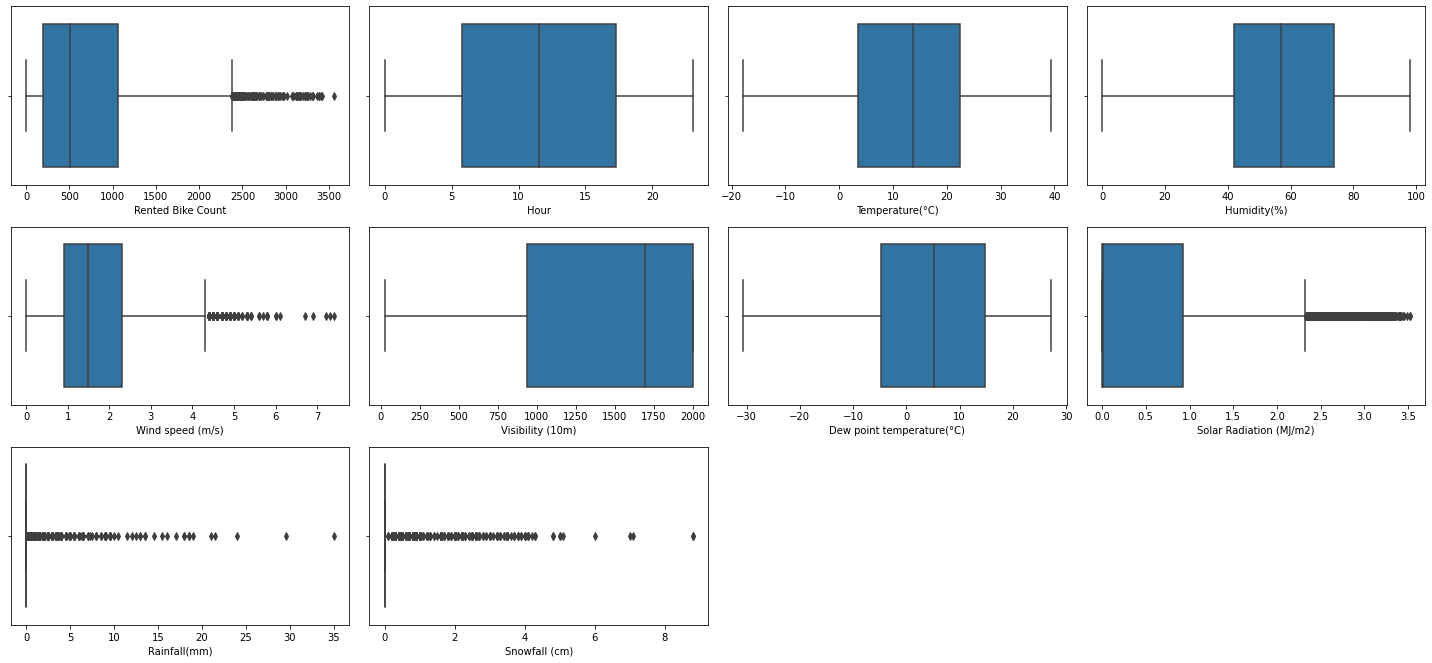

In [21]:
# outlier detection
# plotting boxplot for numerical columns

n = 1
plt.figure(figsize=(20,15))
for column in numeric_cols:
    plt.subplot(5,4,n)
    n = n+1
    sns.boxplot(df[column])
    plt.tight_layout()
plt.show()

### Data Visualization

**Count of rented bikes per hour, daily and monthly basis.**

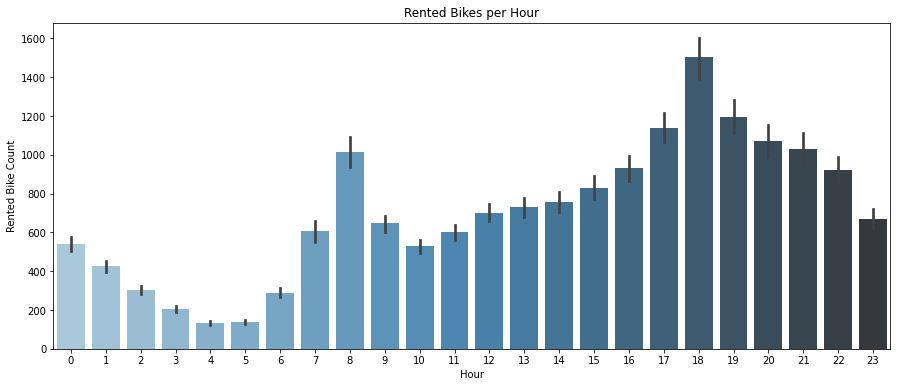

In [22]:
# plotting count of rented bikes per hour.
plt.figure(figsize=[15,6])
plt.title('Rented Bikes per Hour')
sns.barplot(data=df, x='Hour', y='Rented Bike Count', palette="Blues_d")

--Bikes are mostly rented at 8am and between 5pm to 9pm (peaking at 6pm).

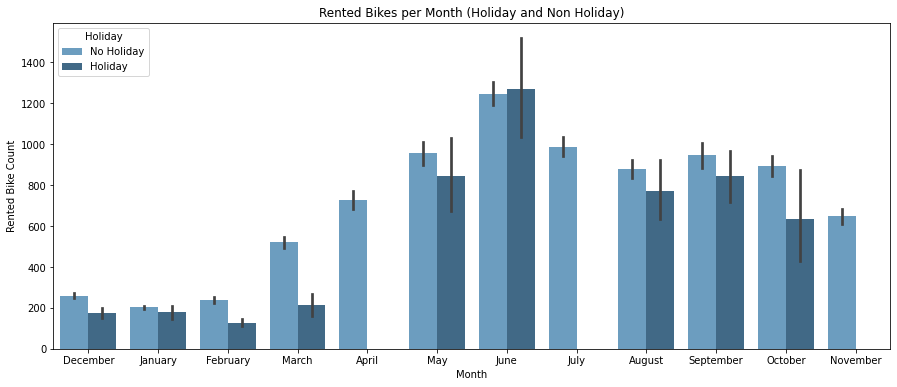

In [23]:
# plotting rented bike count on the basis of months.
plt.figure(figsize=[15,6])
plt.title('Rented Bikes per Month (Holiday and Non Holiday)')
sns.barplot(data=df, x='Month', y='Rented Bike Count', hue='Holiday', palette="Blues_d")

**Demand of bike at different temperature.**

In [ ]:
# plotting the affect of temperature on demand of bikes.

df.groupby('Temperature(°C)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a temperature', colormap='inferno')

-- The demand for bikes is pretty high between 25°C and 35°C.

**Demand of bike at solar radiation**

In [ ]:
# Solar Radiation vs Count of rented bikes
df.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular solar radiation', colormap='inferno')

-- In presence of solar radiation,the demand remains nearly constant.

**Demand of bikes at ranifall**

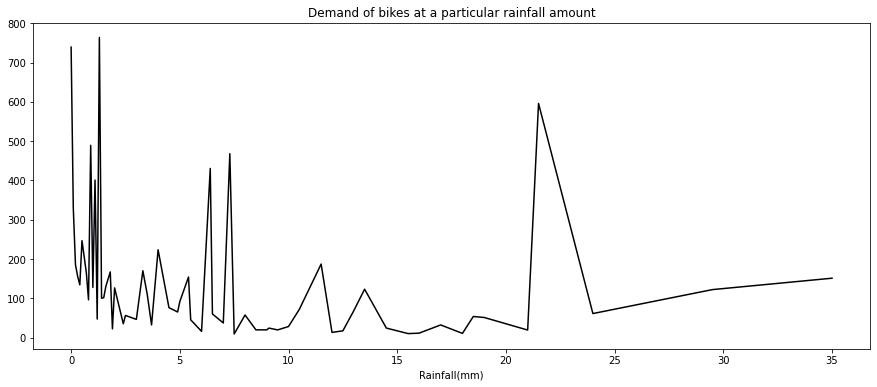

In [26]:
# Rainfall vs Count of rented bikes
df.groupby('Rainfall(mm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular rainfall amount',colormap='inferno')


-- The demand decreases when it rains.

**Demand of bikes at snowfall**

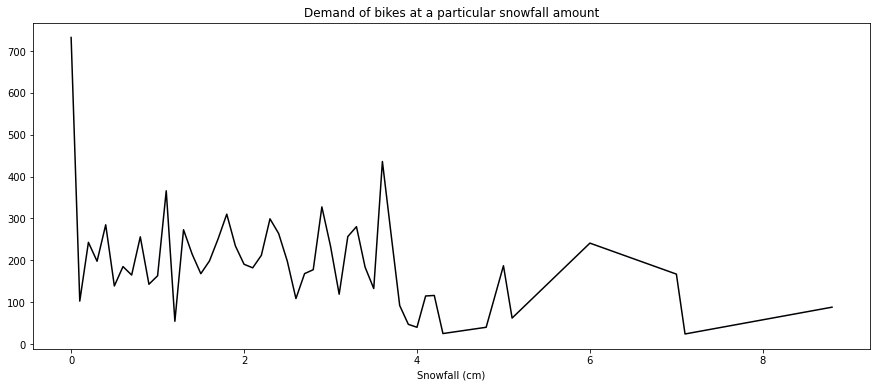

In [27]:
# Snowfall vs Count of rented bikes
df.groupby('Snowfall (cm)')['Rented Bike Count'].mean().plot(figsize=[15,6], title='Demand of bikes at a particular snowfall amount',colormap='inferno')

-- The demand decreases when it snows.

**Bike rented in hours in different seasons**

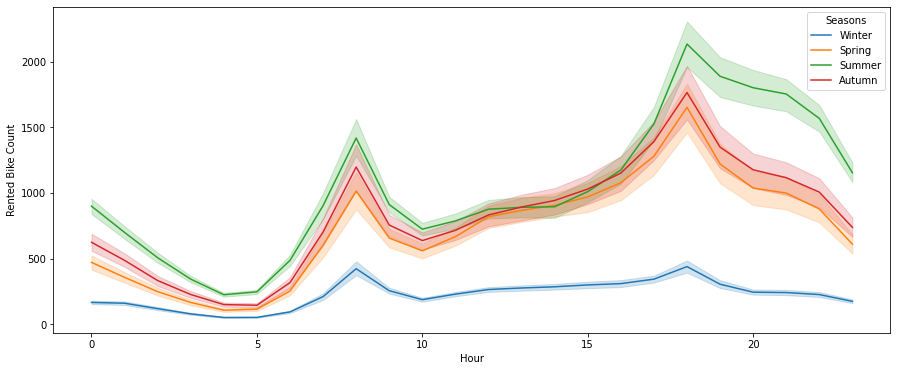

In [28]:
plt.figure(figsize=[15,6])
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons')

-- In each season, the demand peaks around 8am and 6pm-highest

**Bike rented in different days**

In [ ]:
day_df = df.groupby(['Day']).mean()
day_df.reset_index(level=0, inplace=True)
day_df

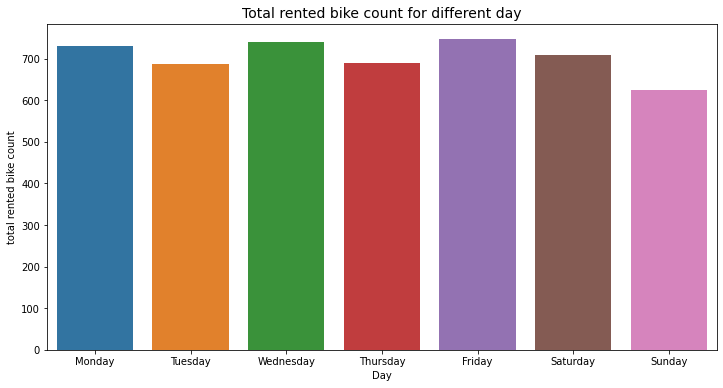

In [32]:
# setting figure size
fig, ax = plt.subplots(1,1, figsize=(12,6))

# reindexing day 
reindex = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_df['Day'] = pd.Categorical(day_df['Day'],categories=reindex,ordered=True)

# plotting
sns.barplot('Day','Rented Bike Count', data=day_df, ci=None )
plt.title('Total rented bike count for different day',fontsize=14)

# setting up x and y label
plt.xlabel("Day")
plt.ylabel("total rented bike count")
plt.show()

-- Sunday has very less number of booking

-- Maximum number of booking is on friday followed by wednesday and monday

**Bike rented in different seasons**

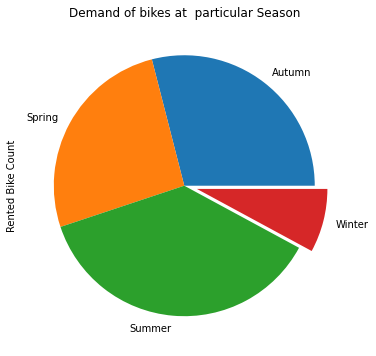

In [33]:
# Season wise demand of bikes.

df.groupby('Seasons')['Rented Bike Count'].sum().plot(kind='pie', figsize=[10,6], title='Demand of bikes at  particular Season',explode = [0,0,0,0.1])

-- Most demanding season is Summer, followed by Autumn and Spring.

---



 -- Demand decreases on winter season.

In [34]:

# creating a new feature 'type of day' with two unique value i.e. "weekend" and "weekday"
df['type of day'] = df['Day'].apply(lambda x: "weekend" if x=='Saturday' or x=='Sunday' else "weekday")

In [ ]:

type_of_day_df = df.groupby('type of day').sum().reset_index().iloc[:, [0,1]]
type_of_day_df

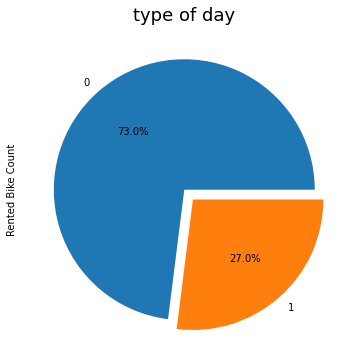

In [40]:
# setting figure size
plt.figure(figsize=(12,6))

#plotting pie plot
type_of_day_df['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%',explode = [0,0.1])

# setting up title
plt.title('type of day',fontsize=18)
plt.show()

-- 73% of bike booked on weekday and remaining 23% are book on weekend

-- The possible reason for this is people have compulsion to go their office, hence they book bike so that they reach office on time.

-- On weekend people booked bike only for their pending work.